## **Importing the required libraries**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

## **Loading the data**

In [2]:
data = pd.read_csv('grpproject.csv')
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
print(data.describe())

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

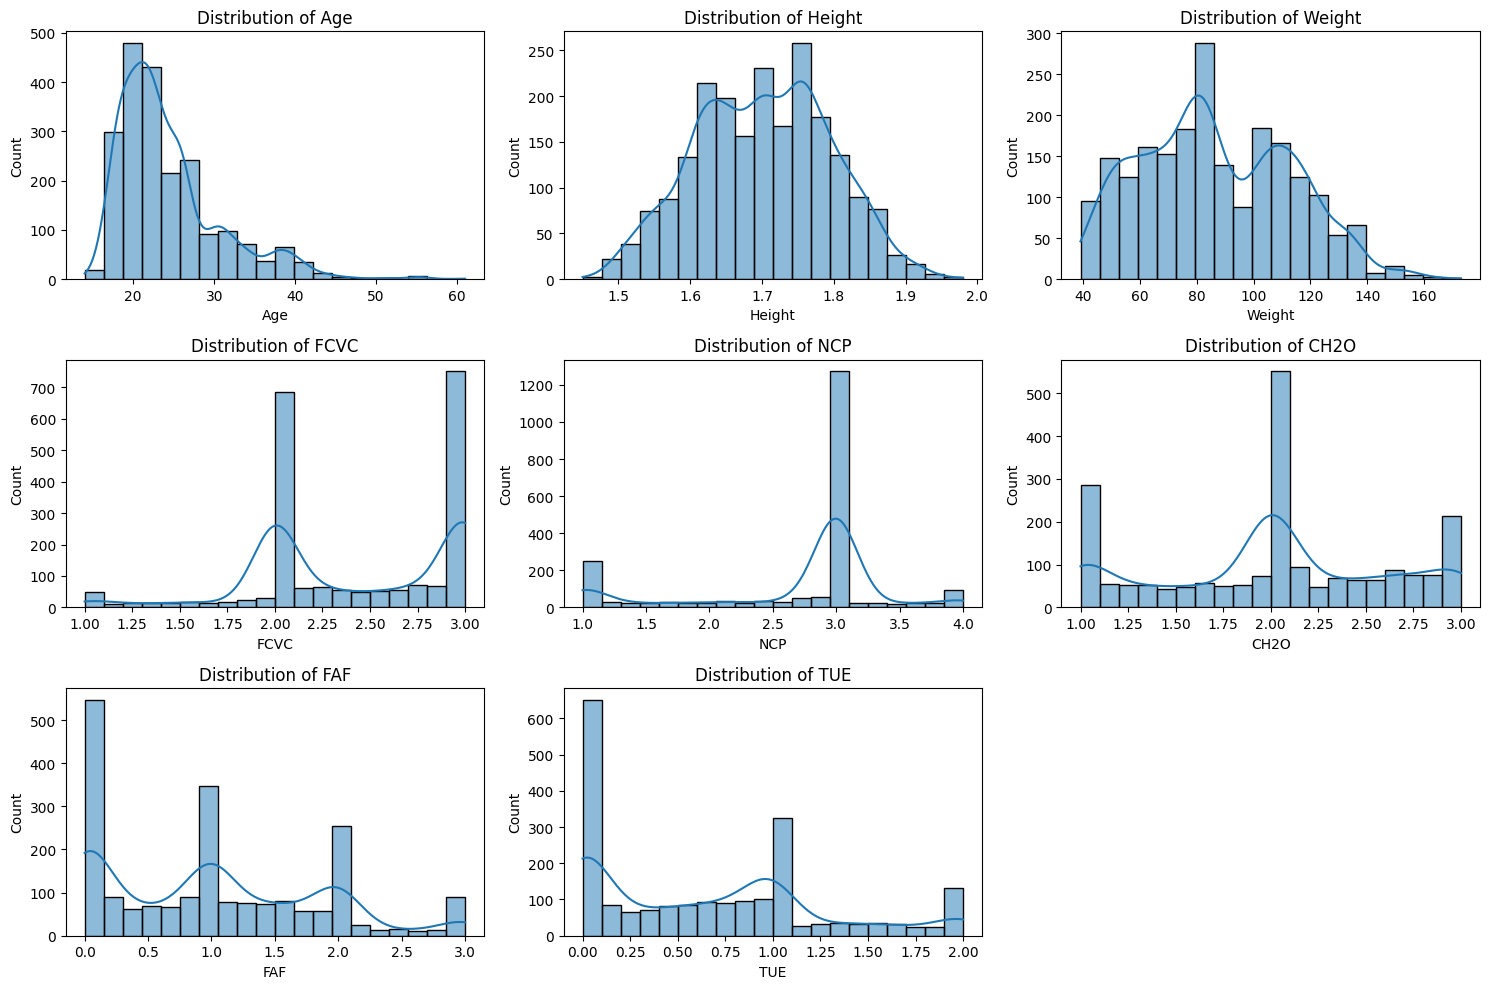

In [5]:
# DISTRIBUTION OF VARIABLES

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for all numerical columns
data_numeric = data.select_dtypes(include=['float64'])

# Create a figure for all histograms
plt.figure(figsize=(15, 10))

# Plot histograms for each numeric column
for i, column in enumerate(data_numeric.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[column], kde=True, bins=20)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

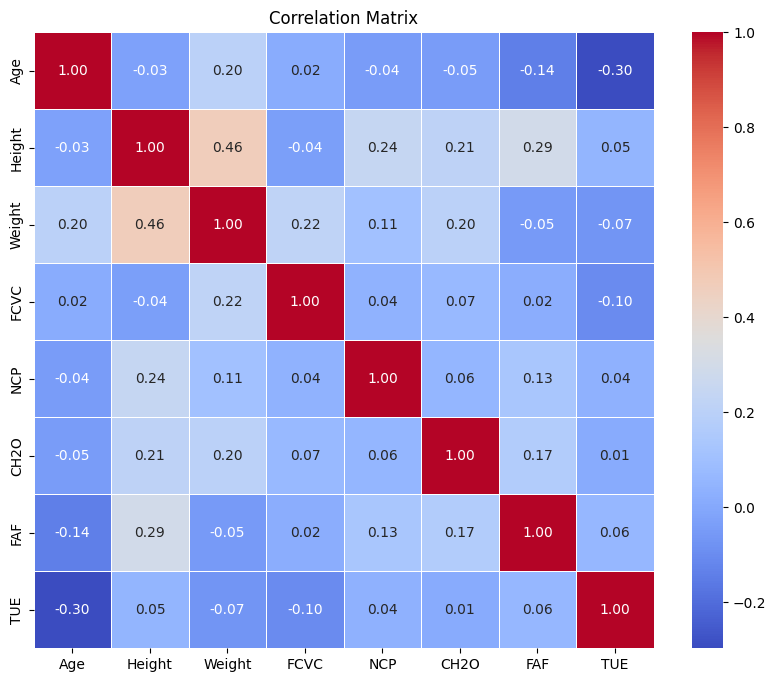

In [6]:
# CORRELATION MATRIX
plt.figure(figsize=(10, 8))
correlation_matrix = data_numeric.corr()

# HEATMAP
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

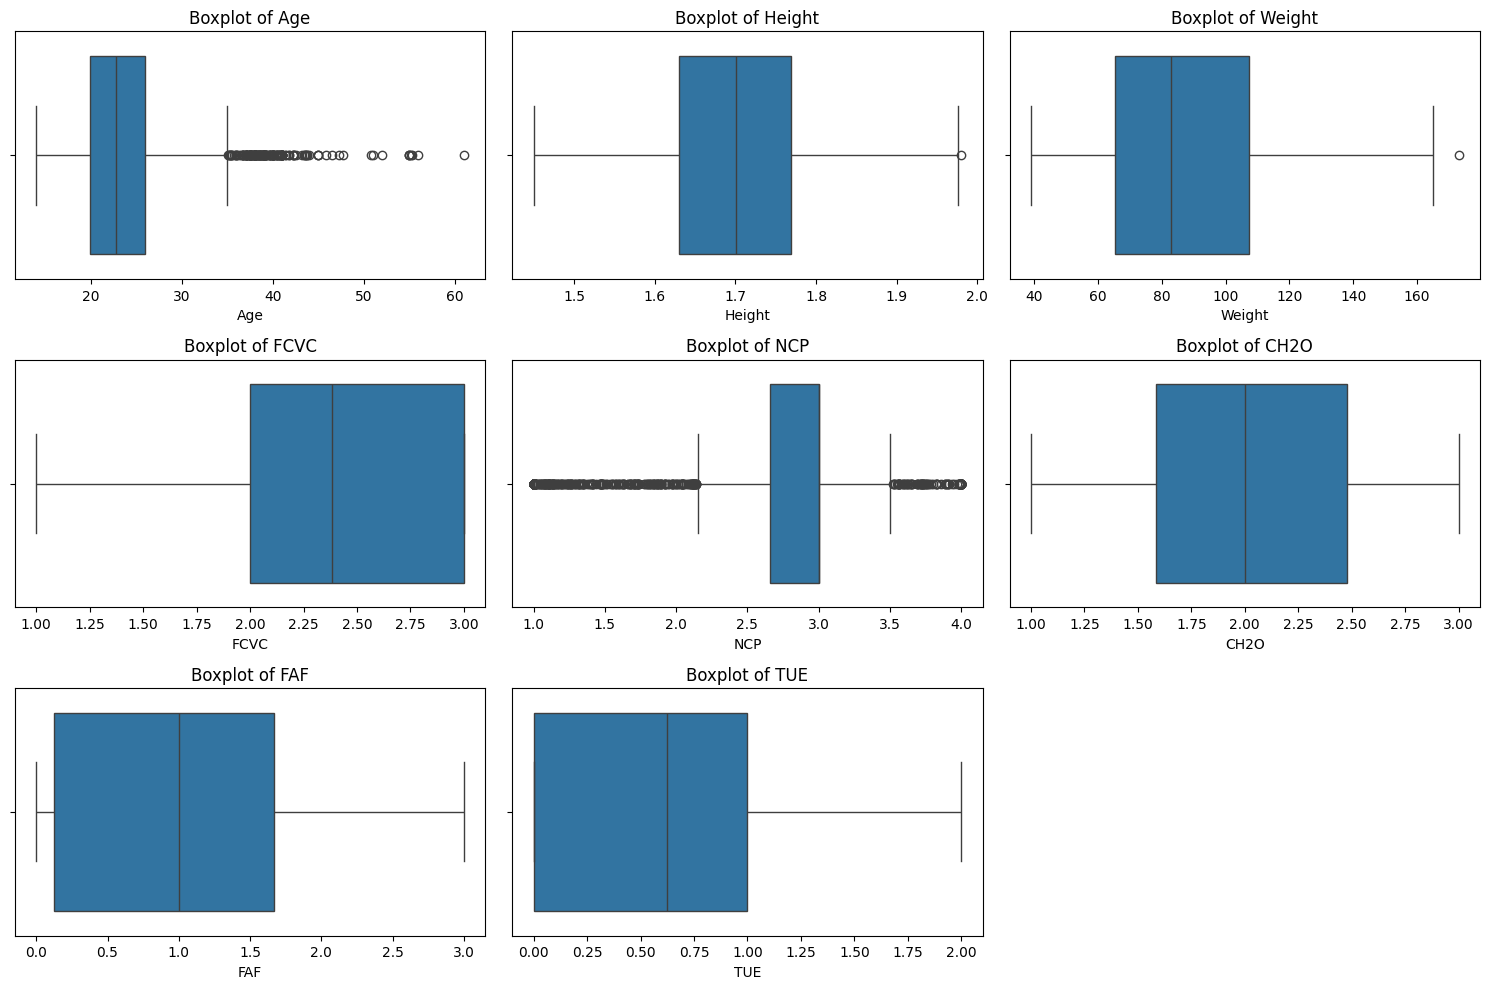

In [7]:
# BOXPLOTS
plt.figure(figsize=(15, 10))

for i, column in enumerate(data_numeric.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [8]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Display the total number of missing values per column
print("Missing values per column:")
print(missing_values)

Missing values per column:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


## **Encoding the categorical variables using Label encoder**

In [9]:
#LabelEncoder encodes the readable categorical values into numerical labels (Example in gender male might be encoded as 0 and female as 1)
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['family_history_with_overweight'] = le.fit_transform(data['family_history_with_overweight'])
data['FAVC'] = le.fit_transform(data['FAVC'])
data['CAEC'] = le.fit_transform(data['CAEC'])
data['SMOKE'] = le.fit_transform(data['SMOKE'])
data['SCC'] = le.fit_transform(data['SCC'])
data['CALC'] = le.fit_transform(data['CALC'])
data['MTRANS'] = le.fit_transform(data['MTRANS'])
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,Overweight_Level_II


## **Encoding the target variables - level of Obesity**

In [10]:
data['NObeyesdad'] = le.fit_transform(data['NObeyesdad']) #encoding the target variables
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


### **Spliting the data into features and target**

In [11]:
X = data.drop(columns=['NObeyesdad'])
y = data['NObeyesdad']

## **Standardising the feature using StandardScaler()**

In [12]:
#Standardscalar() makes the values between 0 and 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## **Spliting the dataset into training and testing**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # spiliting the data with the train size of 80% and test size of 20%

## **training and evaluating the model**

In [14]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}


## **Training all the models using for loop**

In [15]:
from sklearn.metrics import precision_score, recall_score

model_precision = {}
model_recall = {}
model_accuracy = {}
model_f1 = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    model_accuracy[model_name] = accuracy
    model_f1[model_name] = f1
    model_precision[model_name] = precision
    model_recall[model_name] = recall

results_df = pd.DataFrame({
    'Model': list(model_accuracy.keys()),
    'Accuracy': list(model_accuracy.values()),
    'Precision': list(model_precision.values()),
    'Recall': list(model_recall.values()),
    'F1-Score': list(model_f1.values())
})

from IPython.display import display
display(results_df)


,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.943262,0.943460,0.943262,0.943286
1,Logistic Regression,0.874704,0.878969,0.874704,0.871674
2,Random Forest,0.957447,0.958289,0.957447,0.957661
3,K-Nearest Neighbors,0.820331,0.815933,0.820331,0.811322


## **Visualising the Model Accuracy**

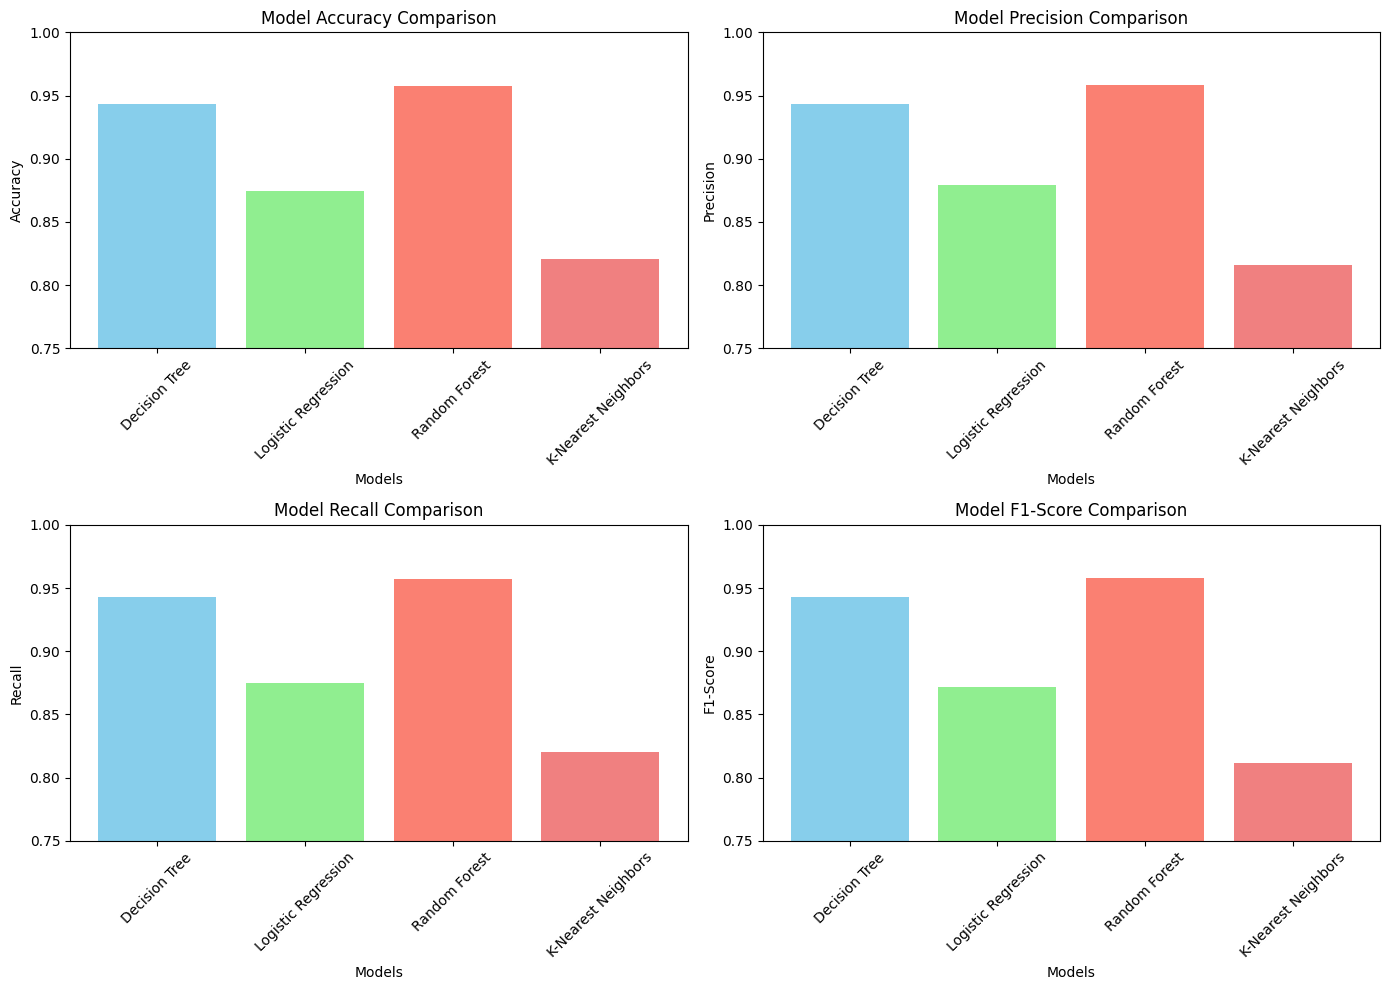

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

# Accuracy
plt.subplot(2, 2, 1)
plt.bar(model_accuracy.keys(), model_accuracy.values(), color=['skyblue', 'lightgreen', 'salmon', 'lightcoral'])
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0.75, 1.0)
plt.xticks(rotation=45)

# Precision
plt.subplot(2, 2, 2)
plt.bar(model_precision.keys(), model_precision.values(), color=['skyblue', 'lightgreen', 'salmon', 'lightcoral'])
plt.title("Model Precision Comparison")
plt.xlabel("Models")
plt.ylabel("Precision")
plt.ylim(0.75, 1.0)
plt.xticks(rotation=45)

# Recall
plt.subplot(2, 2, 3)
plt.bar(model_recall.keys(), model_recall.values(), color=['skyblue', 'lightgreen', 'salmon', 'lightcoral'])
plt.title("Model Recall Comparison")
plt.xlabel("Models")
plt.ylabel("Recall")
plt.ylim(0.75, 1.0)
plt.xticks(rotation=45)

# F1-Score
plt.subplot(2, 2, 4)
plt.bar(model_f1.keys(), model_f1.values(), color=['skyblue', 'lightgreen', 'salmon', 'lightcoral'])
plt.title("Model F1-Score Comparison")
plt.xlabel("Models")
plt.ylabel("F1-Score")
plt.ylim(0.75, 1.0)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## **Making a prediction using Random Forest (Best Model)**

In [17]:
new_data = [[1, 25, 1.75, 70, 1, 0, 2, 3, 1, 0, 2, 1, 1,1, 2, 1]]  # Example input
new_data_scaled = scaler.transform(new_data)  # Scaling the input data
best_model = models['Random Forest']  #  Using Random Forest because of its high accuracy
prediction = best_model.predict(new_data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## **Decoding the encoded prediction to Obesity Levels**

In [18]:
obesity_levels = le.inverse_transform([prediction[0]]) #inversing the encoded prediction back to obesity level
print(f"Prediction for the new data: {obesity_levels[0]}")

Prediction for the new data: Normal_Weight
